<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Материалы Юстины Ивановой: https://github.com/yustinaivanova/netology_statistics_february_20

# Домашнее задание по статистическому анализу на python

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [45]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [46]:
df.head(10)

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0
5,Switzerland,6,11,44.0,21.0,13.0,11.0,7.0,16.0,8.0,4.0
6,Sweden,7,18,34.0,8.0,25.0,10.0,6.0,17.0,13.0,17.0
7,New Zealand,8,15,22.0,12.0,5.0,8.0,5.0,8.0,26.0,14.0
8,Canada,9,23,18.0,49.0,20.0,9.0,11.0,14.0,19.0,8.0
9,Austria,10,10,64.0,24.0,31.0,26.0,19.0,25.0,16.0,15.0


In [47]:
# проверяем датасет на наличие пропущенных значений
df.isnull().sum()

Country (region)            0
Ladder                      0
SD of Ladder                0
Positive affect             1
Negative affect             1
Social support              1
Freedom                     1
Corruption                  8
Generosity                  1
Log of GDP\nper capita      4
Healthy life\nexpectancy    6
dtype: int64

In [48]:
# удаляем строки датасета, где есть пропущенные значения
df = df.dropna()

Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

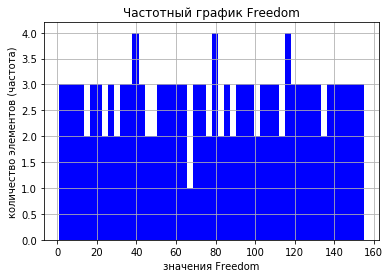

In [49]:
plt.hist(df['Freedom'], 50, facecolor='b')
plt.xlabel('значения Freedom')
plt.ylabel('количество элементов (частота)')
plt.title('Частотный график Freedom')
plt.grid(True)
plt.show()

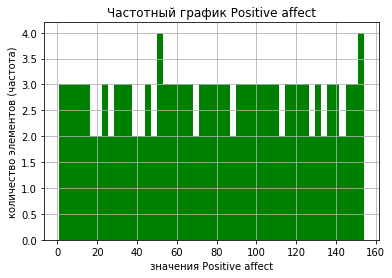

In [50]:
plt.hist(df['Positive affect'], 50, facecolor='g')
plt.xlabel('значения Positive affect')
plt.ylabel('количество элементов (частота)')
plt.title('Частотный график Positive affect')
plt.grid(True)
plt.show()

Данные в колонках Freedom и Positive affect имееют равномерное распределение

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [51]:
print('Медиана:', statistics.median(df['Freedom']))
print('Математическое ожидание:', statistics.mean(df['Freedom']))
print('Стандартное отклонение:', statistics.pstdev(df['Freedom']))
print('Дисперсия:', statistics.pvariance(df['Freedom']))
print('Минимум:', min(df['Freedom']))
print('Максимум:', max(df['Freedom']))
Freedom_range = max(df['Freedom']) -  min(df['Freedom'])
print('Размах:', Freedom_range)
print('Выбросов нет, так как данные в колонке Freedom имеют равномерное распределение')

Медиана: 79.5
Математическое ожидание: 78.82857142857142
Стандартное отклонение: 44.9475794449399
Дисперсия: 2020.2848979591836
Минимум: 1.0
Максимум: 155.0
Размах: 154.0
Выбросов нет, так как данные в колонке Freedom имеют равномерное распределение


In [52]:
print('Мода: ', statistics.mode(df['Freedom']))

StatisticsError: no unique mode; found 140 equally common values

Почему нельзя найти моду?

Потому что нет повторящихся значений в колонке Freedom, данные в колонке Freedom имеют равномерное распределение

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

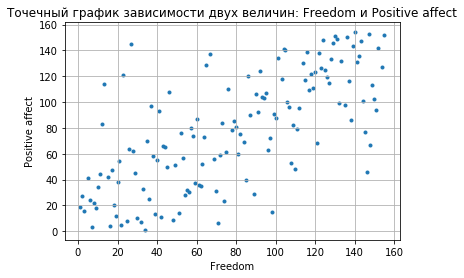

In [53]:
Freedom = df['Freedom']
Positive_affect = df['Positive affect']
plt.xlabel('Freedom')
plt.ylabel('Positive affect')
plt.title('Точечный график зависимости двух величин: Freedom и Positive affect')
plt.grid(True)
plt.scatter(Freedom, Positive_affect, marker='.')

In [54]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(Freedom, Positive_affect)
print('Коэффициент корреляции Пирсона =', corr)

Коэффициент корреляции Пирсона = 0.6965670458090686


График и значение коэффициента корреляции Пирсона (~ 0.7) свидетельствуют о существовании некоторой линейной зависимости между Freedom и Positive affect. Знак коэффициента корреляции Пирсона: "+"  говорит о том, что зависимость прямая: с увеличением одной величины увеличивается и другая.

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [55]:
Freedom_1 = Freedom - statistics.mean(Freedom)
# print(round(statistics.mean(Freedom_1), 1))

In [56]:
# смотрим разброс данных
print(min(Freedom_1))
print(max(Freedom_1))

-77.82857142857142
76.17142857142858


In [57]:
# разброс данных приводим к виду (-1, 1)
# данные Freedom нормализуем в датасете
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
df['Freedom'] = min_max_scaler.fit_transform(np.array(Freedom_1).reshape(-1, 1))
# print(min(df['Freedom']))
# print(max(df['Freedom']))
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,-0.948052,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,-0.935065,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,-0.974026,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,-0.922078,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,-0.766234,12.0,7.0,12.0,18.0


Построить матрицу корреляций для всех колонок таблицы

In [58]:
df.corr()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
Ladder,1.000000,0.555987,0.511870,0.539677,0.833412,0.546414,0.224394,0.485704,0.820608,0.826677
SD of Ladder,0.555987,1.000000,0.090332,0.632734,0.600087,0.250246,0.253344,0.386337,0.663977,0.637554
Positive affect,0.511870,0.090332,1.000000,0.351906,0.433333,0.696567,0.225905,0.417061,0.310843,0.339032
Negative affect,0.539677,0.632734,0.351906,1.000000,0.671387,0.415935,0.166472,0.350541,0.565756,0.507148
Social support,0.833412,0.600087,0.433333,0.671387,1.000000,0.478613,0.148890,0.448135,0.801898,0.755292
Freedom,0.546414,0.250246,0.696567,0.415935,0.478613,1.000000,0.407571,0.498226,0.385919,0.423949
Corruption,0.224394,0.253344,0.225905,0.166472,0.148890,0.407571,1.000000,0.281146,0.186140,0.148973
Generosity,0.485704,0.386337,0.417061,0.350541,0.448135,0.498226,0.281146,1.000000,0.459762,0.453135
Log of GDP\nper capita,0.820608,0.663977,0.310843,0.565756,0.801898,0.385919,0.186140,0.459762,1.000000,0.873628
Healthy life\nexpectancy,0.826677,0.637554,0.339032,0.507148,0.755292,0.423949,0.148973,0.453135,0.873628,1.000000


Загрузить таблицу цен на авокадо: 

In [59]:
df_1=pd.read_csv('data/avocado.csv')
df_1[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

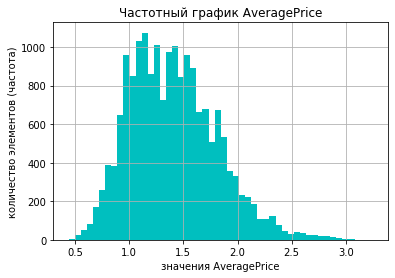

In [60]:
plt.hist(df_1['AveragePrice'], 50, facecolor='c')
plt.xlabel('значения AveragePrice')
plt.ylabel('количество элементов (частота)')
plt.title('Частотный график AveragePrice')
plt.grid(True)
plt.show()

In [28]:
df_1['AveragePrice'].describe()

count    18249.000000
mean         1.405978
std          0.402677
min          0.440000
25%          1.100000
50%          1.370000
75%          1.660000
max          3.250000
Name: AveragePrice, dtype: float64

Данные колонки AveragePrice имеют распределение близкое к нормальному распределению (высокая частота появления около среднего значения)

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

In [61]:
# формируем нужный датасет
df_2 = df_1[['4046', '4225', '4770', 'AveragePrice']]

In [62]:
# строим матрицу корреляций (коээфициенты крорреляции Пирсона), и ввыводим коэффициенты кореляции между величиной Average Price и величинами 4046, 4225, 4770 
df_2.corr().tail(1)

,4046,4225,4770,AveragePrice
AveragePrice,-0.208317,-0.172928,-0.179446,1.0


Полученные коэффициенты корреляции говорят о наличии очень слабой обратной зависимости (значения коэффициентов корреляции ближе к нулю нежелик к -1) между величиной Average Price и величинами 4046, 4225, 4770. С увеличиением количества авокадо с кодами 4046, 4225, 4770 в слабой степени уменьшается средняя цена на авакадо AveragePrice.   

In [30]:
df_3 =  df_1[['4046', '4225', '4770']]
df_3.corr()

,4046,4225,4770
4046,1.000000,0.926110,0.833389
4225,0.926110,1.000000,0.887855
4770,0.833389,0.887855,1.000000


Величины: 4046, 4225, 4770 имеют сильную прямую линенйную зависимость между собой: при увеличении одной из них - увеличиваются и другие